# **Importing Essential Librarires**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import warnings
import random
import sys
from scipy.stats import norm
warnings.filterwarnings('ignore')
style.use('ggplot')
from google.colab import files
random.seed(10)

# **Declaring Global constant Values**

In [ ]:
H0 = 100
c = 3 * (10**5)

# **Defining Functions for computing the luminosity distance and theoretical distance modulus**

In [ ]:
def Eta_function(a, Omega_matter):
  s = ((1 - Omega_matter)/(Omega_matter))**(0.33)
  return_val = 2 * np.sqrt(s**3 + 1) * ((1/(a**4)) - (0.1540 * s/(a**3)) +(0.4304*(s**2/a**2)) + (0.19097*(s**3/a)) + 0.066941 * (s**4))**(-0.125)
  return return_val

In [ ]:
def Luminosity_Distance(z, omega_m):
  return_val = (c)/(H0) * (1+z) * (Eta_function(1, omega_m) - Eta_function((1/(1+z)), omega_m))
  return return_val

# **Defining Function to Convert given covariance array into a matrix**

In [ ]:
def Matrix(arr, N):
  res = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      res[i][j] = arr[N*i + j]
  return res

# **Main Function**

In [ ]:
# Load the data and covariance array
data = np.loadtxt('jla_mub_0.txt')
z = data[:,0]
mu_obs = data[:,1]
cov_array = np.loadtxt('jla_mub_covmatrix.txt')
N = 31
cov_matrix = Matrix(cov_array, N)
cov_inv = np.linalg.inv(cov_matrix)

# Likelihood function
def log_likelihood(params):
    h, om = params
    mu_th = np.zeros_like(mu_obs)
    for i, z_i in enumerate(z):
        # Compute the theoretical value of the distance modulus
        dl = Luminosity_Distance(z_i, om) # Luminosity Distance
        mu_th[i] =  25 - (5 * np.log10(h)) + (5*np.log10(dl)) # distance modulus
    diff = mu_obs - mu_th
    return -0.5 * np.dot(diff, np.dot(cov_inv, diff))

# Prior function
def log_prior(params):
    h, om = params
    if 0.0 < h < 1.0 and 0.0 < om < 1.0:
        return 0.0
    else:
        return -np.inf

# Proposal function Top Hat
def propose(params, scale):
    return np.random.normal(params, scale)

# **MH - MCMC Code**

1) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.55134433 0.34081107]
Covariance of posterior distribution: [[0.00560666 0.00123896]
 [0.00123896 0.00030284]]
Acceptance ratio: 0.573

2) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.70432104 0.28357844]
Covariance of posterior distribution: [[ 4.80932998e-05 -1.18157915e-04]
 [-1.18157915e-04  9.61854879e-04]]
Acceptance ratio: 0.543

3) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.69703533 0.31069548]
Covariance of posterior distribution: [[ 2.69791777e-05 -7.94861695e-05]
 [-7.94861695e-05  4.59555151e-04]]
Acceptance ratio: 0.04

4) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.70619578 0.29867602]
Covariance of posterior distribution: [[0.00025446 0.00014708]
 [0.00014708 0.00983493]]
Acceptance ratio: 0.004

5) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.73662161 0.73901971]
Covariance of posterior distribution: [[4.74486452e-29 4.97445474e-29]
 [4.97445474e-29 5.21515416e-29]]
Acceptance ratio: 0.001

6) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.3 0.3]
Covariance of posterior distribution: [[1.03809341e-29 1.03809341e-29]
 [1.03809341e-29 1.03809341e-29]]
Acceptance ratio: 0.0



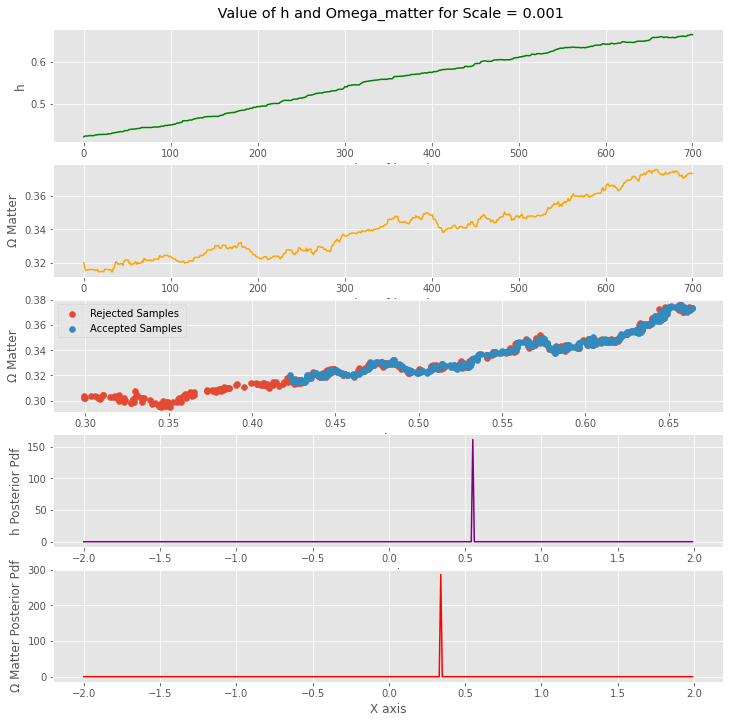

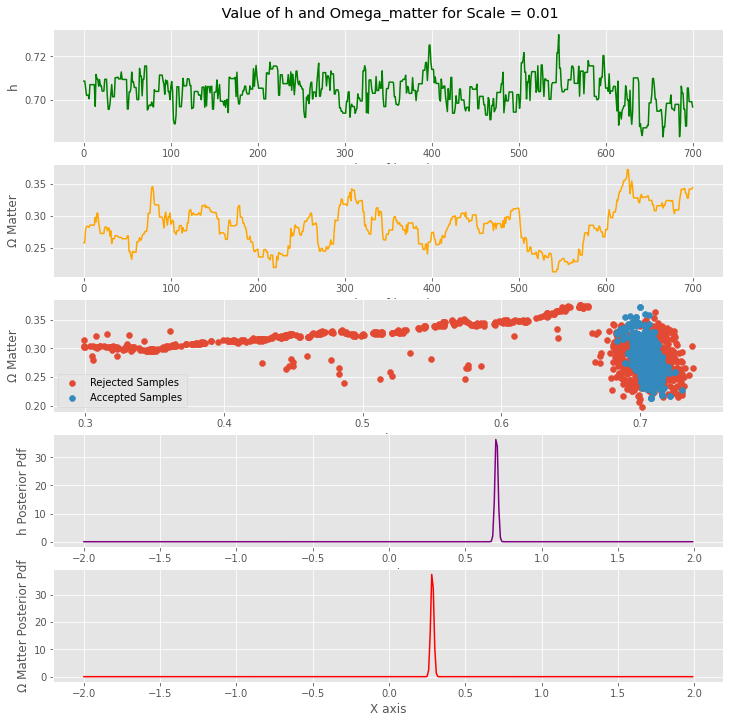

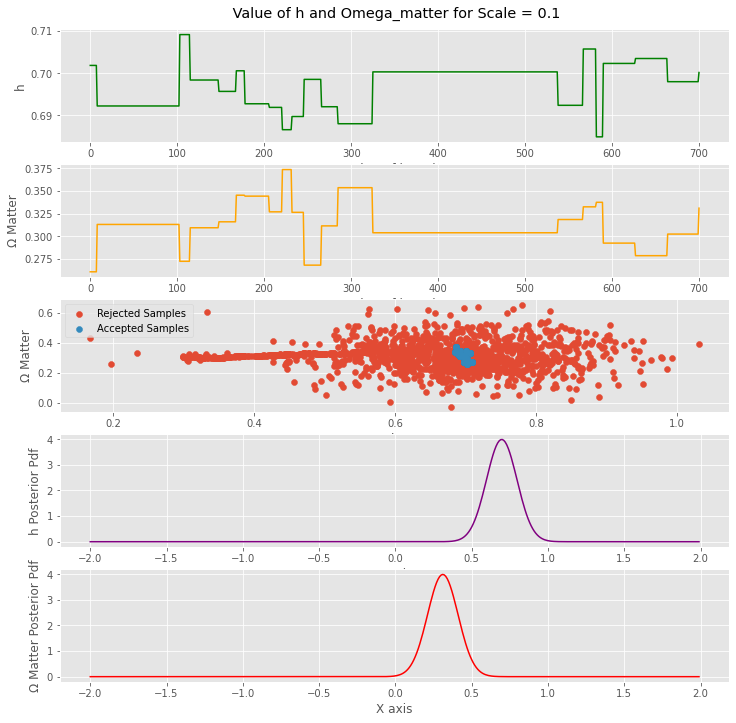

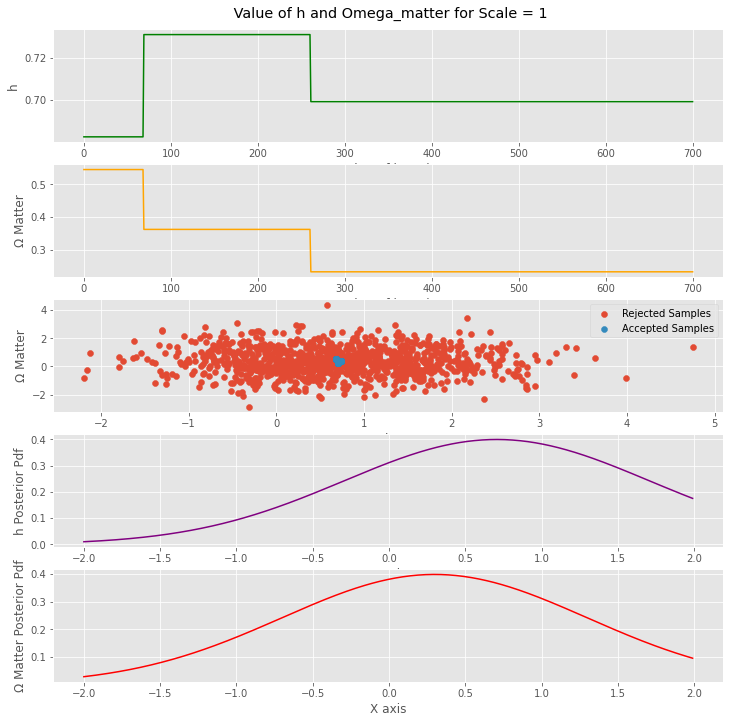

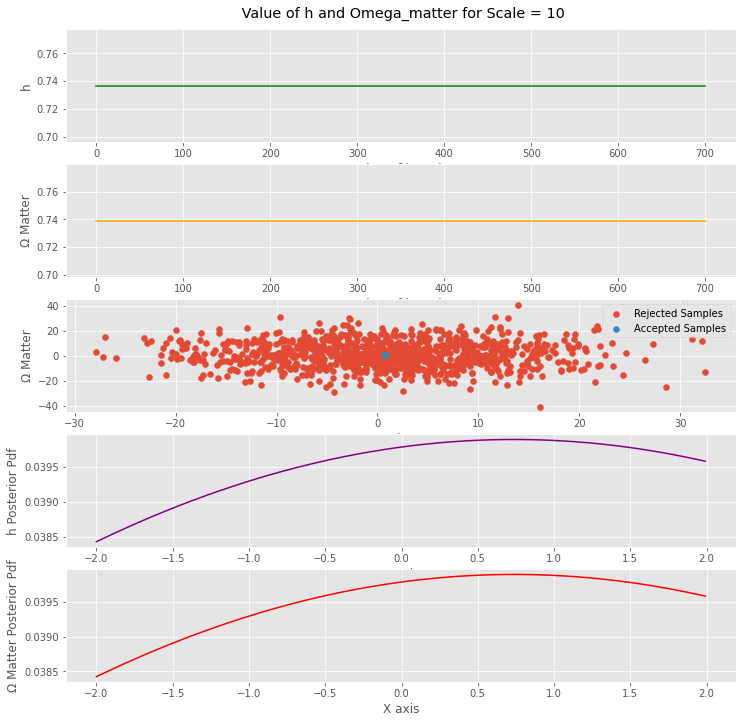

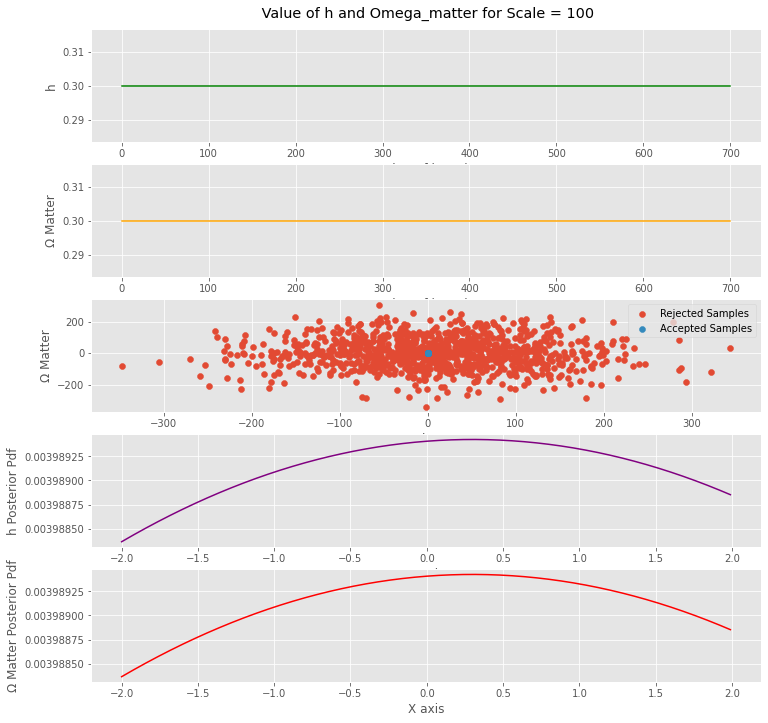

In [ ]:
# Define the Metropolis-Hastings algorithm
Rejected_Samples = []
def metropolis_hastings(log_likelihood, log_prior, propose, params, cov, n_steps, scale):
    chain = [params]
    log_prob_chain = [log_prior(params) + log_likelihood(params)]
    n_accept = 0
    for i in range(n_steps):
        params_new = propose(params, scale)
        log_prob_new = log_prior(params_new) + log_likelihood(params_new)
        log_prob_old = log_prob_chain[-1]
        log_accept_ratio = log_prob_new - log_prob_old
        if np.log(np.random.rand()) < log_accept_ratio:
            chain.append(params_new)
            log_prob_chain.append(log_prob_new)
            params = params_new
            n_accept += 1
        else:
            Rejected_Samples.append((params_new))
            chain.append(params)
            log_prob_chain.append(log_prob_old)
    # # Discard the burn-in period of the chain
    burnin = int(n_steps * 0.3)
    chain = chain[burnin:]
    return np.array(chain), np.array(log_prob_chain), n_accept/n_steps

# Set up initial parameters and run the MCMC algorithm
n_steps = 1000
scale = [0.001,0.01,0.1,1,10,100]
params0 = np.array([0.3, 0.3])
Acceptance = []
for i in range(len(scale)):
  chain, log_prob_chain, acceptance_ratio = metropolis_hastings(log_likelihood, log_prior, propose, params0, cov_matrix, n_steps, scale[i])
  print(str(i+1) + str(") "))
  print("")
  x_axis = np.arange(-2, 2, 0.01)
  # Compute the mean and covariance of the posterior distribution
  post_mean = np.mean(chain, axis=0)
  post_cov = np.cov(chain.T)
  # # Plot the chains
  fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,12))
  title_val = " Value of h and Omega_matter for Scale = " + str(scale[i])
  plt.title(title_val, y = 5.85)
  axes[0].plot(chain[:,0], 'green')
  axes[0].set_ylabel('h')
  axes[0].set_xlabel('Number of iterations')
  axes[1].plot(chain[:,1], 'orange')
  axes[1].set_ylabel('\u03A9 Matter')
  axes[1].set_xlabel('Number of iterations')
  Rejected_h = []
  Rejected_Omega_m = []
  for j in (Rejected_Samples):
    Rejected_h.append(j[0])
    Rejected_Omega_m.append(j[1])
  axes[2].scatter(Rejected_h,Rejected_Omega_m, label = "Rejected Samples")
  axes[2].scatter(chain[:,0], chain[:,1], label = "Accepted Samples")
  axes[2].set_ylabel('\u03A9 Matter')
  axes[2].set_xlabel('h')
  axes[2].legend()
  axes[3].plot(x_axis, norm.pdf(x_axis, post_mean[0], scale[i]), 'purple')
  axes[3].set_ylabel('h Posterior Pdf')
  axes[3].set_xlabel('X axis')
  axes[4].plot(x_axis, norm.pdf(x_axis, post_mean[1], scale[i]), 'red')
  axes[4].set_ylabel('\u03A9 Matter Posterior Pdf')
  axes[4].set_xlabel('X axis')
  fig.tight_layout(pad = 5.0)
  plt.savefig(title_val + ".png")
  files.download(title_val + ".png")


  print('Mean of posterior distribution:', post_mean)
  print('Covariance of posterior distribution:', post_cov)
  print('Acceptance ratio:', acceptance_ratio)
  Acceptance.append(acceptance_ratio)
  print("")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

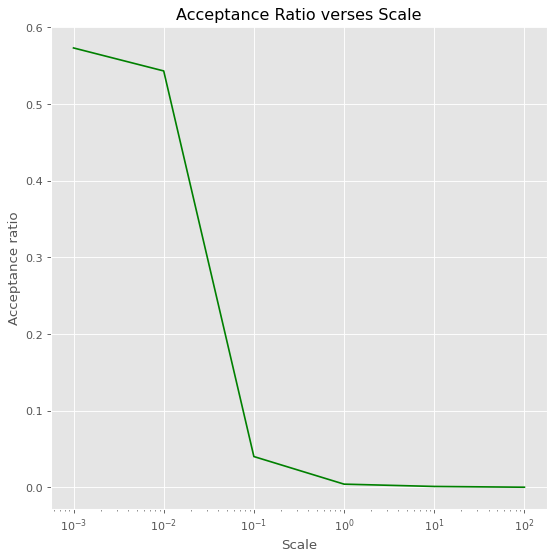

In [ ]:
fig = plt.figure(figsize = (8,8) , dpi = 80)
plt.plot(scale, Acceptance , "g" , )
plt.xlabel("Scale")
plt.ylabel("Acceptance ratio")
plt.title("Acceptance Ratio verses Scale")
plt.xscale("log")
plt.savefig("Acceptance Ratio verses Scale.png")
files.download("Acceptance Ratio verses Scale.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

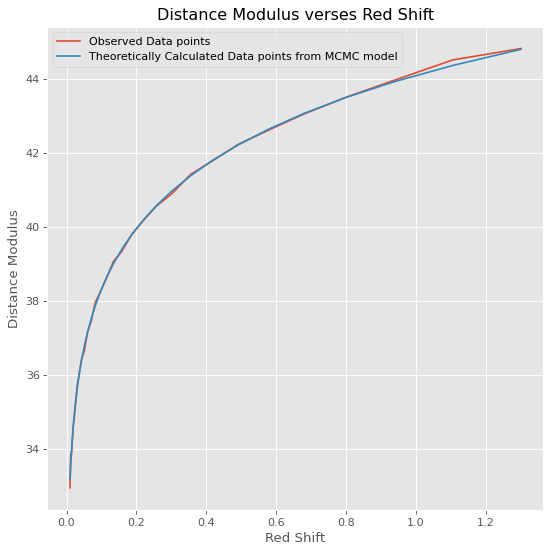

In [ ]:
mu_th_target = []
for z_i in z:
  mu_th_target.append(25 - (5 * np.log10(0.70083242)) + (5*np.log10(Luminosity_Distance(z_i, 0.30083765))))
fig = plt.figure(figsize = (8,8), dpi = 80)
plt.title("Distance Modulus verses Red Shift")
plt.plot(z,mu_obs,label = "Observed Data points")
plt.plot(z,mu_th_target, label = "Theoretically Calculated Data points from MCMC model")
plt.xlabel("Red Shift")
plt.ylabel("Distance Modulus")
plt.legend()
plt.savefig("Distance Modulus verses Red Shift.png")
files.download("Distance Modulus verses Red Shift.png")